# YOLO: You only look once

- Version 1: https://pjreddie.com/media/files/papers/yolo_1.pdf
- Version 2: https://pjreddie.com/media/files/papers/YOLO9000.pdf
- Verison 3: https://pjreddie.com/media/files/papers/YOLOv3.pdf



In [7]:
!pip install tqdm requests opencv-python

In [9]:
from tqdm import tqdm_notebook as tqdm 
import requests
import math
import os

if not os.path.exists("yolo/data/yolo.h5") or os.path.getsize("yolo/data/yolo.h5") < 248714728:
    print("Downloading " + str(248714728 / 1024 / 1024) + " MB.")

    url = "https://downloads.codingcoursestv.eu/037%20-%20neuronale%20netze/yolo.h5"
    # Streaming, so we can iterate over the response.
    r = requests.get(url, stream=True)

    # Total size in bytes.
    total_size = int(r.headers.get('content-length', 0)); 
    block_size = 1024
    with open('yolo/data/yolo.h5', 'wb') as f:
        for data in tqdm(r.iter_content(block_size), total=math.ceil(total_size//block_size), unit='KB', unit_divisor=1024, unit_scale=True):
            f.write(data)
else:
    print("Datei existiert bereits")

In [10]:
import cv2
import numpy as np

from yolo import demo
from yolo.model.yolo_model import YOLO

In [11]:
yolo = YOLO(0.6, 0.5)
file = 'yolo/data/coco_classes.txt'
all_classes = demo.get_classes(file)

/Users/jannisseemann/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [12]:
image = cv2.imread("yolo.jpg")
image = cv2.resize(image, (int(image.shape[1] / 2), int(image.shape[0] / 2)))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = demo.detect_image(image, yolo, all_classes)

time: 11.45s
class: person, score: 1.00
box coordinate x,y,w,h: [ -2.23427474 593.08547401 306.83801329 317.71829224]
class: car, score: 1.00
box coordinate x,y,w,h: [113.89148498 553.93124199 556.5984149  198.5435729 ]



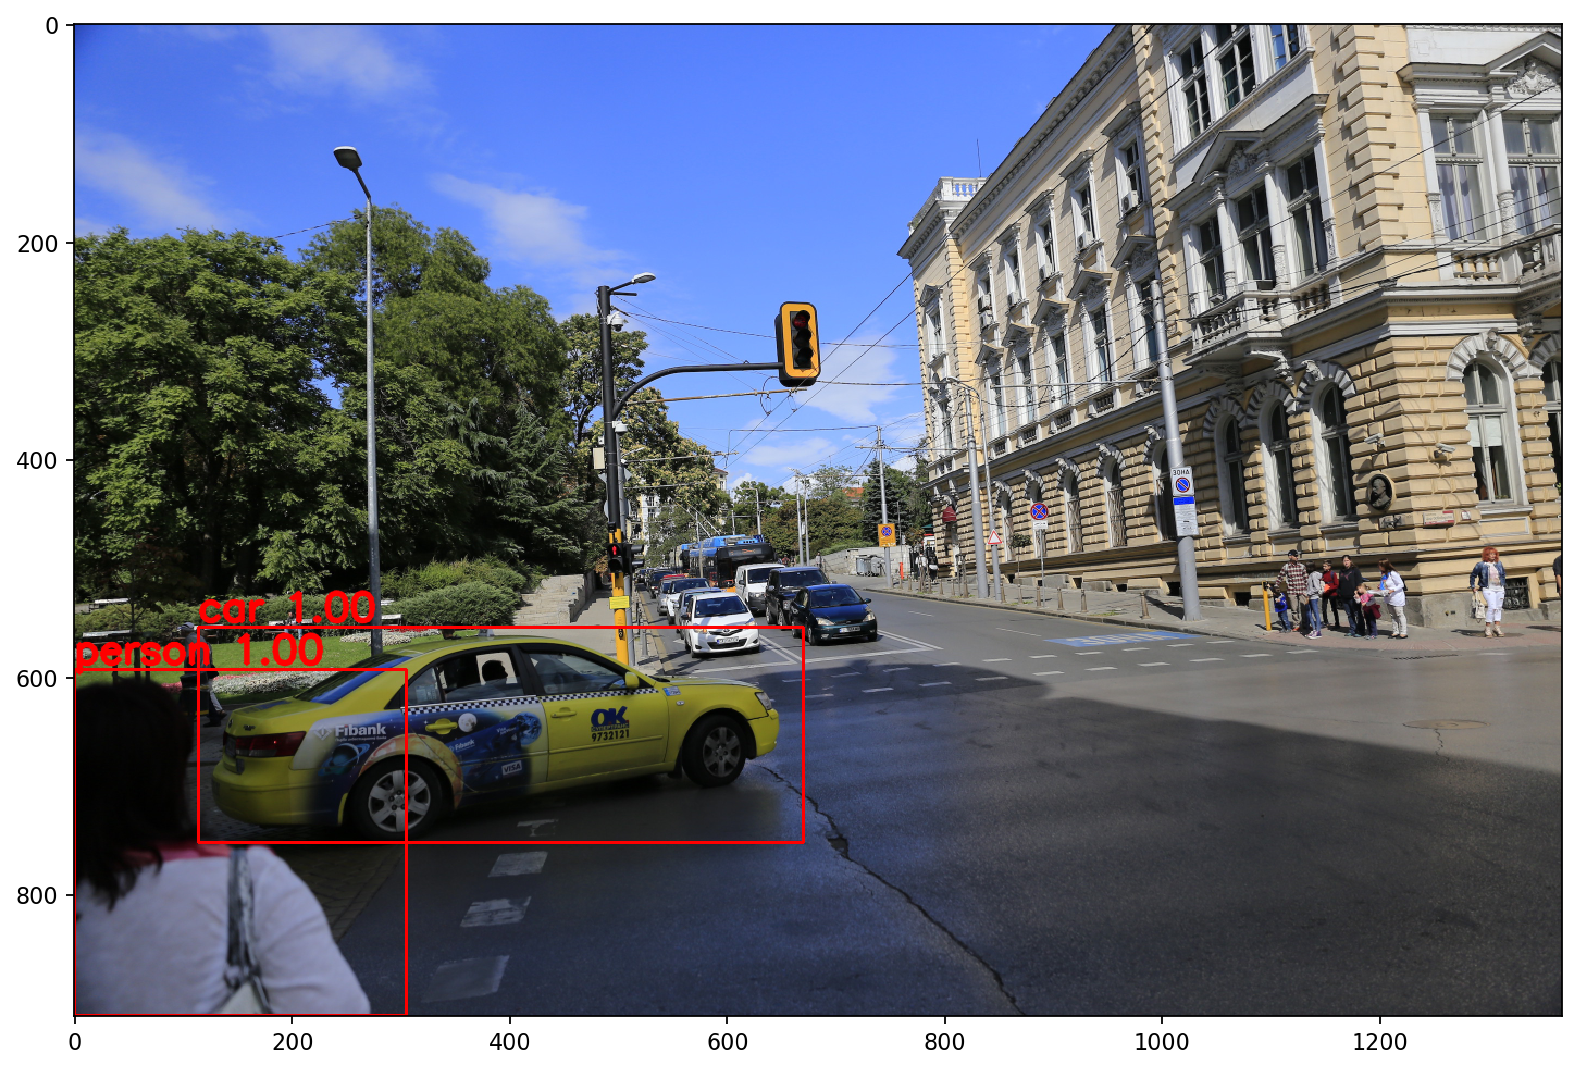

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')

plt.imshow(image)
plt.show()

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.imwrite("yolo_out.jpg", image)

True